# Creating a Mobile App To Prevent Lottery Addiction

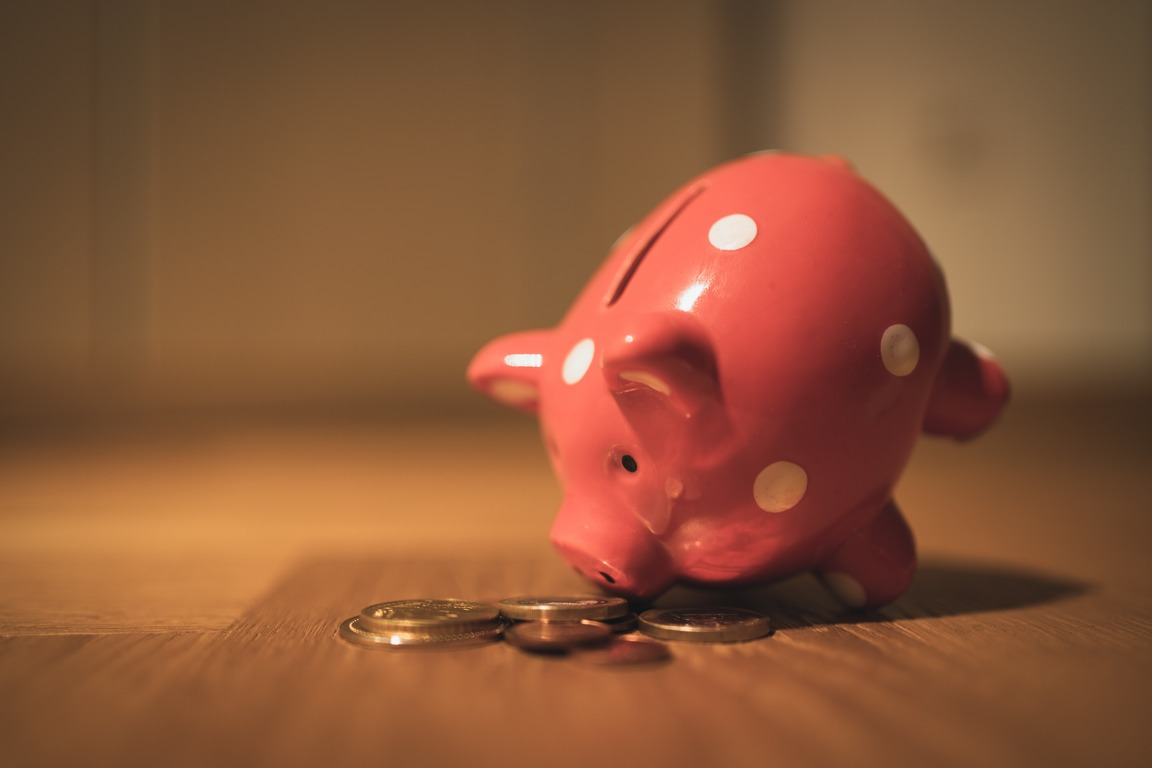

## Introduction

In this project, we're going to contribute to the development of a mobile app that is meant to help lottery addicts better estimate their chances of winning and, hopefully, to prevent them from this dangerous habit. 

We'll focus on the [6/49 lottery](https://en.wikipedia.org/wiki/Lotto_6/49), where six numbers are drawn from a set of 49 (from 1 to 49) for each ticket, and a player wins the big prize if the six numbers on their tickets match all the six numbers drawn. Our goal is to create the logical core of the app and build functions that enable users to answer the following questions:
- What is the probability of winning the big prize with a single ticket?
- What is the probability of winning the big prize if we play several/many different tickets?
- What is the probability of having *exactly* or *at least* 2 (or 3, or 4, or 5) winning numbers on a single ticket?

The historical data used in this project comes from the national 6/49 lottery game in Canada. The [dataset](https://www.kaggle.com/datascienceai/lottery-dataset) counts 3,665 drawings, dating from 1982 to 2018.
### Summary of Results
After creating and testing the functions for different scenarios of participation in the lottery, we found out that for having relatively high chances to win the big prize, we have to buy a number of tickets that costs at least as much as the big prize itself. The probability of having less winning numbers and, hence, winning much smaller prizes is also very low.

## Core Functions
Let's start by writing two functions that we'll use often: for calculation factorials and combinations:

In [1]:
def factorial(n):
    product = 1
    for i in range(n):
        product *= i + 1
    return product

def combinations(n,k):
    '''Returns the number of combinations for taking k objects from a group of n objects'''
    return factorial(n)/(factorial(k) * factorial(n - k))

## One-Ticket Probability
Now, we'll write a function that calculates the probability of winning the big prize for any given ticket.

For the first version of the app, we want players to be able to calculate the probability of winning the big prize with the various numbers they play on a single ticket. The idea is that they input their six numbers from 1 to 49 in the app and receive the probability value in a friendly way, for the people without any probability knowledge to be able to understand.

In [2]:
def check_numbers(lst):
    '''Check if a list of numbers is not longer than 6, contains only numbers from 1 to 49,
    and all the numbers are unique. If everything satisfied, returns a string of numbers 
    separated by commas.
    '''
    string = ''
    for i in range(len(lst)):
        if lst[i] > 49 !=6  or lst[i] < 1 != 6 or len(set(lst)) != 6:
            string = 'You should insert six different numbers in the range from 1 to 49 😈'
            return string
        if i != len(lst) - 1:
            string += str(lst[i]) + ', '
        else: 
            string += 'and '+str(lst[-1])
    return string

def one_ticket_probability(lst):
    '''Takes in a list of 6 unique numbers from 1 to 49 inclusive 
    and prints the probability of winning in an easy-to-understand way
    '''
    string = check_numbers(lst)
    if string.startswith('You'):
        return string
    
    c = int(combinations(49,6))
    p = 1/c * 100
      
    msg = (
           f'Your chances to win the big prize with the numbers {string} are only {p:.6f}%.\n'
           f'That means: \n'     
           f'1) 1 chance out of {c:,},\n'  
           f'2) 373 times less probably than becoming a billionaire in general. \n'
           f'Probably, you should consider another approach for getting rich 🤑'
           )
    return msg

# Testing the function
tests = [[1,2,3,4,5,6],       # correct input
        [1,2,3,4,5],          # less than 6 numbers
        [1,2,3,4,5,1],        # repeated numbers
        [1,2,3,4,5,100]]      # numbers larger than 49 or smaller than 1

for test in tests:
    print(one_ticket_probability(test), '\n')
    print('___________________________________________________________________________________________\n')

Your chances to win the big prize with the numbers 1, 2, 3, 4, 5, and 6 are only 0.000007%.
That means: 
1) 1 chance out of 13,983,816,
2) 373 times less probably than becoming a billionaire in general. 
Probably, you should consider another approach for getting rich 🤑 

___________________________________________________________________________________________

You should insert six different numbers in the range from 1 to 49 😈 

___________________________________________________________________________________________

You should insert six different numbers in the range from 1 to 49 😈 

___________________________________________________________________________________________

You should insert six different numbers in the range from 1 to 49 😈 

___________________________________________________________________________________________



## Historical Data Check for Canada Lottery
Another feature of our app is that it should enable users to compare their tickets against the historical lottery data in Canada and determine whether they would have ever won by now. We're going to write a function to implement this idea, but first, let's open the [dataset](https://www.kaggle.com/datascienceai/lottery-dataset) with the historical data of winning numbers and get familiar with its structure:

In [3]:
import pandas as pd
lottery = pd.read_csv('649.csv')

print(f'\033[1mNumber of rows:\033[0m {lottery.shape[0]:,}\n'
      f'\033[1mNumber of columns:\033[0m {lottery.shape[1]}\n')

lottery.head(3)

Number of rows: 3,665
Number of columns: 11



,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,6/12/1982,3,11,12,14,41,43,13
1,649,2,0,6/19/1982,8,33,36,37,39,41,9
2,649,3,0,6/26/1982,1,6,23,24,27,39,34


In [4]:
lottery.tail(3)

,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
3662,649,3589,0,6/13/2018,6,22,24,31,32,34,16
3663,649,3590,0,6/16/2018,2,15,21,31,38,49,8
3664,649,3591,0,6/20/2018,14,24,31,35,37,48,17


In [5]:
print(f"\033[1mTotal number of missing values in `lottery`:\033[0m {lottery.isnull().sum().sum()}")

Total number of missing values in `lottery`: 0


The dataframe contains 11 columns with self-explanatory names, including the columns for each of the six drawn numbers + a bonus number. There are no missing values in the dataframe.
### Function for Historical Data Check
Now, let's write a function for comparing any ticket with the historical data. It's supposed to output the following:
- the number of times the combination selected occurred in the dataset,
- the probability of winning the big prize in the next drawing with that combination.

In [6]:
def extract_numbers(row):
    '''Takes a row of the lottery dataframe and returns a set containing all the six 
    winning numbers'''
    return set(row[4:10])

# Testing the function
print(f"\033[1mFirst row:\033[0m {extract_numbers(lottery.iloc[0])}\n")

# Extracting all the combinations of winning numbers
win_num = lottery.apply(extract_numbers, axis=1)
print('\033[1mFirst 3 winning combinations:\033[0m \n', win_num.head(3), sep='')

First row: {3, 41, 11, 12, 43, 14}

First 3 winning combinations: 
0    {3, 41, 11, 12, 43, 14}
1    {33, 36, 37, 39, 8, 41}
2     {1, 6, 39, 23, 24, 27}
dtype: object


In [7]:
def check_historical_occurence(lst, hist_data):
    '''
    Given a list of user's numbers and a Series of historical winning number sets, compares
    the list against the Series, outputs information about the number of matches and
    the probability of winning the big prize in the next drawing with that combination
    '''
    string = check_numbers(lst)
    if string.startswith('You'):
        return string
    
    count=0
    if set(lst) in hist_data.values:
            count += 1
    if count==0:
        print(f'Your combination of numbers {string} is absent in the dataset\n')
    elif count==1 or count%10==1:
        print(f'Your combination of numbers {string} occured {count} time in the dataset\n')
    else:
        print(f'Your combination of numbers {string} occured {count} times in the dataset\n')
    return one_ticket_probability(lst)

# Testing the function
tests = [[3, 41, 11, 12, 43],         # less than 6 numbers
         [3, 41, 11, 12, 43, 14],     # occured combination
         [3, 4, 11, 12, 43, 14]]      # absent combination

for test in tests:
    print(check_historical_occurence(test, win_num))
    print('_______________________________________________________________________________________________\n')

You should insert six different numbers in the range from 1 to 49 😈
_______________________________________________________________________________________________

Your combination of numbers 3, 41, 11, 12, 43, and 14 occured 1 time in the dataset

Your chances to win the big prize with the numbers 3, 41, 11, 12, 43, and 14 are only 0.000007%.
That means: 
1) 1 chance out of 13,983,816,
2) 373 times less probably than becoming a billionaire in general. 
Probably, you should consider another approach for getting rich 🤑
_______________________________________________________________________________________________

Your combination of numbers 3, 4, 11, 12, 43, and 14 is absent in the dataset

Your chances to win the big prize with the numbers 3, 4, 11, 12, 43, and 14 are only 0.000007%.
That means: 
1) 1 chance out of 13,983,816,
2) 373 times less probably than becoming a billionaire in general. 
Probably, you should consider another approach for getting rich 🤑
_________________________

## Multi-Ticket Probability

Lottery addicts usually play more than one ticket on a single drawing, thinking that this might significantly increase their chances of winning. To help them better estimate their chances, we're going to write a function for calculating the probability for any number of different tickets. The idea is that the user can input the number of different tickets they want to play from 1 to 13,983,816 (the maximum number of different tickets, as we saw earlier), and the function will  output information about the probability of winning the big prize in that case.

In [8]:
def multi_ticket_probability(num):
    '''Given a number of tickets played, prints the probability of winning the big prize'''
    comb = int(combinations(49,6))
    p = num/comb * 100
    
    if num<1 or num>comb:
        return f'You should input a number between 1 and {comb:,} inclusive 😈'
    if p<1:
        if num==1 or num%10==1:
            msg = (
                   f'Your chances to win the big prize playing {num:,} ticket are only {p:.6f}%.\n'  
                   f'Your chances to spend ${3*num:,} CAD on your tickets are 100%, though 😧\n'
                   )
        else:
            msg = (
                   f'Your chances to win the big prize playing {num:,} tickets are only {p:.6f}%.\n'  
                   f'Your chances to spend ${3*num:,} CAD on your tickets are 100%, though 😧\n'
                   )
    elif num<1666667:        
        if num==1 or num%10==1:
            msg = (
                   f'Your chances to win the big prize playing {num:,} ticket are only {round(p)}%.\n'  
                   f'Your chances to spend ${3*num:,} CAD on your tickets are 100%, though 😧\n'
                   )
        else:
            msg = (
                   f'Your chances to win the big prize playing {num:,} tickets are only {round(p)}%.\n'  
                   f'Your chances to spend ${3*num:,} CAD on your tickets are 100%, though 😧\n'
                   )
    else:
        if num%10==1:
            msg = (
                   f'Your chances to win the big prize playing {num:,} ticket are {round(p)}%.\n'  
                   f'However, you\'ll pay for all your tickets at least as much as the big prize itself 🙉\n'
                   )
        else:
            msg = (
                   f'Your chances to win the big prize playing {num:,} tickets are {round(p)}%.\n'
                   f'However, you\'ll pay for all your tickets at least as much as the big prize itself 🙉\n'
                   )
    return msg
            
# Testing the function
tests = [0, 
         1,
         10000, 
         139839,        # 1/100 of the maximum number of different tickets
         1398382,       # 1/10 of the maximum number of different tickets
         1666667,       # a number of tickets that costs as the big prize
         6991908,       # 1/2 of the maximum number of different tickets
         13983816]      # the maximum number of different tickets

for test in tests:
    print(multi_ticket_probability(test))
    print('_____________________________________________________________________________________\n')

You should input a number between 1 and 13,983,816 inclusive 😈
_____________________________________________________________________________________

Your chances to win the big prize playing 1 ticket are only 0.000007%.
Your chances to spend $3 CAD on your tickets are 100%, though 😧

_____________________________________________________________________________________

Your chances to win the big prize playing 10,000 tickets are only 0.071511%.
Your chances to spend $30,000 CAD on your tickets are 100%, though 😧

_____________________________________________________________________________________

Your chances to win the big prize playing 139,839 tickets are only 1%.
Your chances to spend $419,517 CAD on your tickets are 100%, though 😧

_____________________________________________________________________________________

Your chances to win the big prize playing 1,398,382 tickets are only 10%.
Your chances to spend $4,195,146 CAD on your tickets are 100%, though 😧

_________________

We can make several observations here:
- To have at least 1% of chances to win the big prize of 5,000,000 CAD (Canadian dollars), we have to buy 139,839 different tickets, each of which cost 3 CAD (you can check [this post](https://www.republicworld.com/world-news/lottery-news/lotto-6-49-canada-results-for-april-7-2021-winning-numbers.html) published on 08.04.2021). Hence, just to have such an insignificant probability, we have to pay 419,517 CAD.
- To have 10% of chances, which are still very low, we have to buy 1,398,382 tickets, paying for them 4,195,146, i.e. 84% of the value of the big prize itself.
- Starting from the number of tickets equal to 1,666,667, the chances increase to 12% and more, up to 100% in case of buying the maximum number of different tickets (13,983,816). **However**, the amount of money we have to pay for all those tickets increases from the value of the big prize itself (5,000,000 CAD) to about 8 times more than that value, making the whole venture absolutely senseless.

## Probability of Having Less Winning Numbers
In most 6/49 lotteries, there are smaller prizes if a player's ticket match two, three, four, or five of the six numbers drawn. Hence, the users might be interested in knowing the probability of having exactly two, three, four, or five winning numbers. In this section, we're going to write a function to allow the users to calculate this probability. The concept is that the user inputs their combination of six numbers and the number of winning numbers expected (an integer between 2 and 5), and the app displays information about the probability of having exactly that number of winning numbers. In reality, for our function to work, the specific combination on the ticket is irrelevant behind the scenes, and we only need the number of winning numbers expected.

In [9]:
def probability_less_6(num):
    '''Takes in an integer between 2 and 5 and prints information about the chances of 
    having exactly that number of winning numbers
    '''
    if num<2 or num>5:
        return 'You should input a number between 2 and 5 inclusive 😈'
    comb = int(combinations(6,num))
    lottery_outcomes = int(combinations(43, 6 - num))
    success_outcomes = comb * lottery_outcomes
    tot_outcomes = combinations(49,6)
    p = success_outcomes/tot_outcomes * 100
    if p<1:
        return f'Your chances to have exactly {num} winning numbers are only {p:.6f}%'
    else:
        return f'Your chances to have exactly {num} winning numbers are only {p:.2f}%'
    
# Testing the function
for test in [1,2,3,4,5]:
    print(probability_less_6(test))
    print('__________________________________________________________________\n')

You should input a number between 2 and 5 inclusive 😈
__________________________________________________________________

Your chances to have exactly 2 winning numbers are only 13.24%
__________________________________________________________________

Your chances to have exactly 3 winning numbers are only 1.77%
__________________________________________________________________

Your chances to have exactly 4 winning numbers are only 0.096862%
__________________________________________________________________

Your chances to have exactly 5 winning numbers are only 0.001845%
__________________________________________________________________



We see that even the probability of having at least 2 winning numbers (and winning a smaller prize) is rather low, not to mention the other numbers. 
## Probability of Having Less Winning Numbers – at Least N
Finally, let's consider the case when the user is interested in knowing the probability of having *at least* two, three, four, or five winning numbers. The function here will be similar to the one above, only that the number of successful outcomes for having at least N winning numbers will be the sum of the numbers of successful outcomes for having exactly N winning numbers, N+1, etc., up to and including 6. Again, the specific combination on the ticket doesn't matter under the hood.

In [10]:
def probability_at_least_num(num):
    '''Takes in an integer between 2 and 5 and prints information about the chances of 
    having at least that number of winning numbers
    '''
    if num<2 or num>5:
        return 'You should input a number between 2 and 5 inclusive 😈' 
    
    success_outcomes = 0
    for n in range(num,7):          
        comb = int(combinations(6,n))
        lottery_outcomes = int(combinations(43, 6 - n))
        success_outcomes += comb * lottery_outcomes     
    tot_outcomes = combinations(49,6)
    p = success_outcomes/tot_outcomes * 100  
        
    if p<1:
        return f'Your chances to have at least {num} winning numbers are only {p:.6f}%'
    else:
        return f'Your chances to have at least {num} winning numbers are only {p:.3f}%'
    
# Testing the function
for test in [1,2,3,4,5]:
    print(probability_at_least_num(test))
    print('__________________________________________________________________\n')

You should input a number between 2 and 5 inclusive 😈
__________________________________________________________________

Your chances to have at least 2 winning numbers are only 15.102%
__________________________________________________________________

Your chances to have at least 3 winning numbers are only 1.864%
__________________________________________________________________

Your chances to have at least 4 winning numbers are only 0.098714%
__________________________________________________________________

Your chances to have at least 5 winning numbers are only 0.001852%
__________________________________________________________________



Since the probabilities of having an *exact* number of winning numbers were already quite low, summing up the numbers of successful outcomes in order to have *at least* N winning numbers didn't contribute much to increasing the chances.
## Conclusion
In this project, we considered different strategies of participating in the 6/49 lottery: playing  one vs. several tickets, expecting to win the big prize or a smaller one (in case of having less than 6 winning numbers), using historical data to check if a combination of numbers has ever won before. We created and tested several functions for calculating the probability of winning in all of these scenarios, which are supposed to be used for a mobile app to help players better estimate their chances of winning and, hopefully, to discourage them from playing. Below are our main insights:
- The chances to win the big prize with a single ticket are extremely low.
- To have relatively high chances of winning the big prize, the player has to buy **a huge amount of tickets**. For having only 12% of the probability, they have to spend on the tickets the sum equal to the big prize itself, making the whole venture totally unreasonable.
- The probability of having less winning numbers is still very low even for 2 numbers. Given that other prizes are significantly smaller than the big one, while the price for a ticket remains the same, we have a rather failing strategy also in this case.